# Model Explainability with ELI5

[ELI5](https://eli5.readthedocs.io/en/latest/index.html) is a Python library which allows to visualize and debug various Machine Learning models using unified API. It has built-in support for several ML frameworks and provides a way to explain black-box models.

![QA](https://brisbanevineyard.org/wp-content/uploads/2016/07/Question-everything.jpg)

### Import General Libraries

In [27]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

### German Credit Data
This dataset classifies people described by a set of attributes as good or bad credit risks.

In [3]:
from sklearn.datasets import fetch_openml

original_features, labels = fetch_openml('credit-g', return_X_y=True, as_frame=True)

In [4]:
original_features.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes


In [5]:
labels.head()

0    good
1     bad
2    good
3    good
4     bad
Name: class, dtype: category
Categories (2, object): [good, bad]

### Prepare Data for Training

In [6]:
# map the target categories to integers
label_to_int = {'good': 1, 'bad': 0}
int_to_label = {1: 'good', 0: 'bad'}

In [7]:
# one-hot-encoding for the categorical features
encoded_features = pd.get_dummies(original_features, prefix_sep=': ')
labels = labels.map(label_to_int)

In [8]:
from sklearn.model_selection import train_test_split

# train test split
features_train, features_test, labels_train, labels_test = train_test_split(encoded_features, labels, test_size=0.2)

**Scaling**, compared to **Normalizaing**, gives a more intuitive meaning to the resulting **linear model weights**

In [9]:
from sklearn.preprocessing import MinMaxScaler

# feature scaling
scaler = MinMaxScaler()
features_train = pd.DataFrame(scaler.fit_transform(features_train), 
                                columns=encoded_features.columns)
features_test = pd.DataFrame(scaler.transform(features_test), 
                                columns=encoded_features.columns)

### Training a simple Logistic Regression model (White Box)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

regressor = LogisticRegression(max_iter=10000)
regressor.fit(features_train, labels_train)

print(accuracy_score(labels_test, regressor.predict(features_test)))

0.715


### Analyzing the resulting model with ELI5

In [11]:
import eli5

**Global model interpretation (Amplitude + Direction)** <br>
Let's see in general what type of features are related to good credit and bad credit. <br> 
For linear models, it's just the model weights, but presented sorted and colored for clarity!

In [12]:
eli5.explain_weights(regressor, feature_names=encoded_features.columns.to_list(), 
                     target_names=int_to_label)

Explanation(estimator="LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n                   intercept_scaling=1, l1_ratio=None, max_iter=10000,\n                   multi_class='auto', n_jobs=None, penalty='l2',\n                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,\n                   warm_start=False)", description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target='good', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=2.193647319698836, std=None, value=None), FeatureWeight(feature='credit_history: critical/other existing credit', weight=1.000896167259066, std=None, value=None), FeatureWeight(feature='checking_status: no checking', weight=0.8138594113906703, std=None, value=None), FeatureWeight(feature='purpose: domestic appliance', weight=0.8018299419515248, std=None, value=None), FeatureWeight(feature='purpose: used car', weight=0.695164391185057, std=None, value=None), FeatureWeight(feature='age', weight=0.5669231592835985, std=None, value=None), FeatureWeight(feature='other_parties: guarantor', weight=0.4921574045912372, std=None, value=None), FeatureWeight(feature='employment: 4<=X<7', weight=0.4416553604566577, std=None, value=None)], neg=[FeatureWeight(feature='duration', weight=-1.4634086284009664, std=None, value=None), FeatureWeight(feature='credit_amount', weight=-1.3395206850221912, std=None, value=None), FeatureWeight(feature='purpose: new car', weight=-0.873097961151957, std=None, value=None), FeatureWeight(feature='purpose: education', weight=-0.8561468034981157, std=None, value=None), FeatureWeight(feature='checking_status: <0', weight=-0.7472272017707997, std=None, value=None), FeatureWeight(feature='credit_history: no credits/all paid', weight=-0.6455001049099894, std=None, value=None), FeatureWeight(feature='existing_credits', weight=-0.6190881127152529, std=None, value=None), FeatureWeight(feature='installment_commitment', weight=-0.6092678840686777, std=None, value=None), FeatureWeight(feature='credit_history: all paid', weight=-0.5867488395606082, std=None, value=None), FeatureWeight(feature='other_parties: co applicant', weight=-0.5435727673165546, std=None, value=None), FeatureWeight(feature='property_magnitude: no known property', weight=-0.43124067967708596, std=None, value=None), FeatureWeight(feature='savings_status: <100', weight=-0.4277431313851409, std=None, value=None)], pos_remaining=22, neg_remaining=20), proba=None, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

**Local model interpretation (Amplitude + Direction)** <br>
For a specific prediction we can highlight what specific features led the model to its prediction. <br>
For this linear model it's basically the corresponding model weight * sample feature.

In [13]:
test_sample_idx = 0
print('True label: {}'.format(int_to_label[labels_test.iloc[test_sample_idx]]))
eli5.explain_prediction(regressor, features_test.iloc[test_sample_idx], target_names=int_to_label)

True label: good


Explanation(estimator="LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n                   intercept_scaling=1, l1_ratio=None, max_iter=10000,\n                   multi_class='auto', n_jobs=None, penalty='l2',\n                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,\n                   warm_start=False)", description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target='good', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=2.193647319698836, std=None, value=1.0), FeatureWeight(feature='checking_status: no checking', weight=0.8138594113906703, std=None, value=1.0), FeatureWeight(feature='age', weight=0.2834615796417992, std=None, value=0.49999999999999994), FeatureWeight(feature='personal_status: male single', weight=0.2371586956223343, std=None, value=1.0), FeatureWeight(feature='housing: own', weight=0.19869836731488155, std=None, value=1.0), FeatureWeight(feature='credit_history: existing paid', weight=0.1459454449618008, std=None, value=1.0), FeatureWeight(feature='property_magnitude: life insurance', weight=0.10947253445693567, std=None, value=1.0), FeatureWeight(feature='own_telephone: yes', weight=0.0755284436330785, std=None, value=1.0), FeatureWeight(feature='employment: >=7', weight=0.05641902513443865, std=None, value=1.0), FeatureWeight(feature='other_parties: none', weight=0.051030852507434776, std=None, value=1.0)], neg=[FeatureWeight(feature='installment_commitment', weight=-0.6092678840686777, std=None, value=1.0), FeatureWeight(feature='savings_status: <100', weight=-0.4277431313851409, std=None, value=1.0), FeatureWeight(feature='foreign_worker: yes', weight=-0.4256801544193556, std=None, value=1.0), FeatureWeight(feature='existing_credits', weight=-0.4127254084768353, std=None, value=0.6666666666666667), FeatureWeight(feature='duration', weight=-0.30129001172961073, std=None, value=0.20588235294117646), FeatureWeight(feature='credit_amount', weight=-0.23220917319152598, std=None, value=0.17335243553008595), FeatureWeight(feature='job: skilled', weight=-0.15883469835758418, std=None, value=1.0), FeatureWeight(feature='purpose: furniture/equipment', weight=-0.11821527817741395, std=None, value=1.0), FeatureWeight(feature='num_dependents', weight=-0.0855599816237633, std=None, value=1.0), FeatureWeight(feature='other_payment_plans: bank', weight=-0.028493956778215444, std=None, value=1.0), FeatureWeight(feature='residence_since', weight=-0.026378498709279538, std=None, value=1.0)], pos_remaining=0, neg_remaining=0), proba=0.7922963994471688, score=1.3388234974448072, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [14]:
test_sample_idx = 2
print('True label: {}'.format(int_to_label[labels_test.iloc[test_sample_idx]]))
eli5.explain_prediction(regressor, features_test.iloc[test_sample_idx], target_names=int_to_label)

True label: good


Explanation(estimator="LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n                   intercept_scaling=1, l1_ratio=None, max_iter=10000,\n                   multi_class='auto', n_jobs=None, penalty='l2',\n                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,\n                   warm_start=False)", description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target='good', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=2.193647319698836, std=None, value=1.0), FeatureWeight(feature='checking_status: no checking', weight=0.8138594113906703, std=None, value=1.0), FeatureWeight(feature='other_payment_plans: none', weight=0.36686505964161464, std=None, value=1.0), FeatureWeight(feature='personal_status: male single', weight=0.2371586956223343, std=None, value=1.0), FeatureWeight(feature='age', weight=0.2328434404200494, std=None, value=0.41071428571428575), FeatureWeight(feature='housing: own', weight=0.19869836731488155, std=None, value=1.0), FeatureWeight(feature='credit_history: existing paid', weight=0.1459454449618008, std=None, value=1.0), FeatureWeight(feature='property_magnitude: life insurance', weight=0.10947253445693567, std=None, value=1.0), FeatureWeight(feature='own_telephone: yes', weight=0.0755284436330785, std=None, value=1.0), FeatureWeight(feature='employment: >=7', weight=0.05641902513443865, std=None, value=1.0), FeatureWeight(feature='other_parties: none', weight=0.051030852507434776, std=None, value=1.0)], neg=[FeatureWeight(feature='duration', weight=-1.205160046918443, std=None, value=0.8235294117647058), FeatureWeight(feature='purpose: new car', weight=-0.873097961151957, std=None, value=1.0), FeatureWeight(feature='credit_amount', weight=-0.7447522433256508, std=None, value=0.5559841304826979), FeatureWeight(feature='savings_status: <100', weight=-0.4277431313851409, std=None, value=1.0), FeatureWeight(feature='foreign_worker: yes', weight=-0.4256801544193556, std=None, value=1.0), FeatureWeight(feature='installment_commitment', weight=-0.20308929468955922, std=None, value=0.3333333333333333), FeatureWeight(feature='job: high qualif/self emp/mgmt', weight=-0.1206428134685119, std=None, value=1.0), FeatureWeight(feature='residence_since', weight=-0.026378498709279538, std=None, value=1.0)], pos_remaining=0, neg_remaining=0), proba=0.6118094262997529, score=0.45492445071417653, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

### Training a simple Neural Network model (Black Box)

In [ ]:
from keras.layers import Dense, Dropout
from keras.models import Sequential, load_model
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint

In [ ]:
nn = Sequential()
nn.add(Dense(10, activation='relu', input_shape=[encoded_features.shape[1],]))
nn.add(Dropout(0.5))
nn.add(Dense(1, activation='sigmoid'))

In [ ]:
nn.compile(optimizer=RMSprop(lr=0.01),
           loss='binary_crossentropy',
           metrics=['accuracy'])

# in case we want to reset our weights
nn.save('init_weights.h5')

In [29]:
callbacks = [ModelCheckpoint('credit_trained.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')]

In [ ]:
nn.fit(features_train, labels_train,
       batch_size=32,
       validation_split=0.2,
       callbacks=callbacks,
       epochs=1000)

### Explainability through Permutation Importance
Compute feature importances for any black-box estimator by measuring how score decreases when a feature is not available; the method is also known as “Mean Decrease Accuracy (MDA)”. <br>
<br>
Very similar to the way feature importance is computed in Random Forest algorithms ([Breiman, “Random Forests”, Machine Learning, 45(1), 5-32, 2001](https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf)) <br>
<br>
To do that one can remove feature from the dataset, re-train the estimator and check the score. But it requires re-training an estimator for each feature, which can be computationally intensive. Also, it shows what may be important within a dataset, not what is important within a concrete trained model.



In [19]:
from eli5.permutation_importance import get_score_importances

In [20]:
# nn = load_model('credit_trained.h5')

In [31]:
# the more 'correct' but computationally expensive method to compute feature importance
def score_with_train(features, labels):
  nn.load_weights('init_weights.h5')
  nn.fit(features, labels, 
            epochs=1000)
  predictions = nn.predict_classes(features)
  return accuracy_score(labels, predictions)

# the faster option, without re-training, noising features on the test set
def score_without_train(features, labels):
  predictions = nn.predict_classes(features)
  return accuracy_score(labels, predictions)

In [ ]:
base_score, score_decreases = get_score_importances(score_without_train, 
                                                    features_test.values, 
                                                    labels_test.values, 
                                                    n_iter=3)

feature_importances = np.mean(score_decreases, axis=0)

In [33]:
feature_importances = pd.DataFrame({'importance': feature_importances}, 
                                   index=encoded_features.columns)

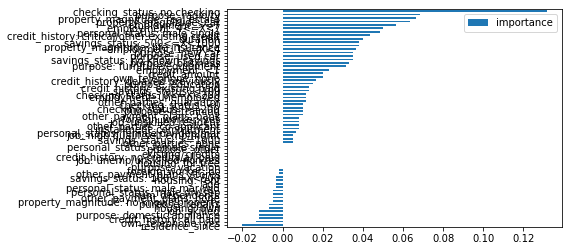

In [34]:
feature_importances.sort_values(by='importance').plot.barh()

Too much cluttering on the feature names (y-axis) but we get a general idea on overall feature importance trend, and even observe a peculiar behaviour of **negative importance features!** <br>
We will plot the top 10 best/worst to get a better impression on the features

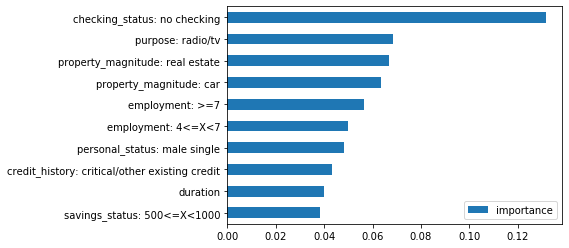

In [35]:
# plot the top 10 most important features
feature_importances.sort_values(by='importance')[-10:].plot.barh()

Please note that this feature importance is only for 'Amplitude', we don't know the direction (positive / negative) impact each feature has on the prediction.

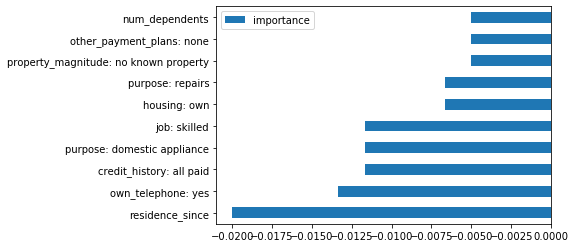

In [36]:
# plot the top 10 least important features
feature_importances.sort_values(by='importance')[:10].plot.barh()

This weird phenomenon where you're better off without some of the features is actually quite common when you're performing one-hot-encoding on categorical features. <br>
In a way, every one-hot-encoding operation always makes 1 redundant feature, because all the information needed is in n-1 encoded features from n categories (i.e 0 for n-1 categories means 1 for the nth category). Keeping these redundant features allows for more degrees of freedom for your model to overfit on your data and not generalize well on the test set (on which this permutance computation is checked on). 

# Explaining Keras image classifier predictions with Grad-CAM
From [Grad-CAM: Visual Explanations from Deep Networks via Gradient-based Localization](https://arxiv.org/abs/1610.02391): <br>
" We propose a technique for producing "visual explanations" for decisions from a large class of CNN-based models, making them more transparent. Our approach - Gradient-weighted Class Activation Mapping (Grad-CAM), uses the gradients of any target concept, flowing into the final convolutional layer to produce a coarse localization map highlighting important regions in the image for predicting the concept. "


In [54]:
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from keras.preprocessing.image import load_img, img_to_array

In [ ]:
# we'll inspect an already trained model on ImageNet
model = MobileNetV2(include_top=True, weights='imagenet', classes=1000)

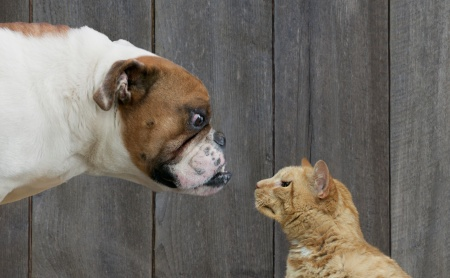

In [42]:
from PIL import Image

image = 'woof_meow.jpg'
im = Image.open(image)
display(im)

In [52]:
# prepare image as input to MobileNet model
dims = model.input_shape[1:3] # (height, width)
im = load_img(image, target_size=dims)
doc = img_to_array(im)
doc = np.expand_dims(doc, axis=0)
doc = preprocess_input(doc)

In [57]:
# predict classes for image
predictions = model.predict(doc)

# check the top 5 indices
decode_predictions(predictions)

[[('n02108089', 'boxer', 0.3668898),
  ('n02129165', 'lion', 0.12986171),
  ('n02108422', 'bull_mastiff', 0.11059377),
  ('n02093256', 'Staffordshire_bullterrier', 0.07208044),
  ('n02112137', 'chow', 0.022743672)]]

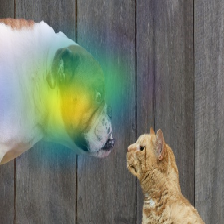

In [58]:
# let'e further examine with ELI5 why the model chose 'boxer' as its top prediction
eli5.show_prediction(model, doc)

We can see that the model is indeed focused on the Boxer's head for its top 5 predictions! Also very specific area in terms of activation map. <br>
<br>
But what about the cat? Since there's a cat in the image as well, and model was trained to classify cat, there should be some activations for this class. <br>
We can explore the gradient flow for other targets as well to see their activations:

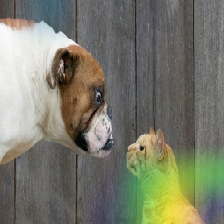

In [59]:
cat_idx = 282 # ImageNet index for 'cat'
eli5.show_prediction(model, doc, targets=[cat_idx]) # pass the class id

We can see that the cat portion of the image did trigger activations for the cat class, however, its just that the classes for dog types were getting stronger signals which pushed the classification towards 'Boxer' in the end.

### Looking at features from different layers
Already demonstrated in [Visualizing and Understanding Convolutional Networks](https://arxiv.org/abs/1311.2901), we know that the first convolutional layers tend to learn relativly simple features, whereas the deeper layers tend to learn more complex and specific features for each class. <br>
We can visualize the activation map for different depths of the network to get a better sense of what were the activations in each layer with ELI5:

block_2_expand


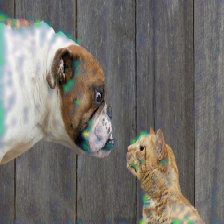

block_9_expand


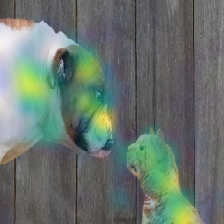

Conv_1


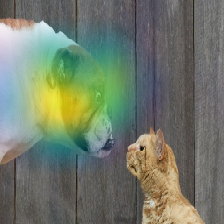

In [61]:
for layer in ['block_2_expand', 'block_9_expand', 'Conv_1']:
    print(layer)
    display(eli5.show_prediction(model, doc, layer=layer))

Indeed we can see that the **first layers** were activating on simple features such as **edges**, it seems the **middle layer** was already targeting the two **animals** but didn't differentiate between them, and the **final layer** was activated specically on the **dog**. 
<br>
<br>
These are good examples showing the model are making robust and specific classifications. <br>
A bad example would be the following: <br>
![Bad Example](https://i.ibb.co/cwJs8B1/dog-side-by-side.jpg) <br>
Here we can see that model actually predicted a **correct** classification 'dog'! But the main triggers for this activation have nothing to do with what's relevant for classifying the dog in the photo! thus it's most likely a **fluke** which won't generalize well to other examples.
<br>
<br>
Verify your model and avoid these kind of mistakes in production: <br>
![catdog](https://i.ibb.co/DMDC0ph/catdog.jpg)

### Creator of this Notebook:
Dan Bochman | [LinkedIn](https://www.linkedin.com/in/danbochman/)